<a href="https://colab.research.google.com/github/TanuRajput110/Google-Playstore-App-Reviews/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [301]:
#imporing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [302]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [303]:
#loading dataset
df=pd.read_csv('/content/gdrive/MyDrive/projects and csv/Play Store Data.csv')

####Information of Dataset

In [304]:
#overview of dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [305]:
#size of dataset
df.shape

(10841, 13)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##Cleaning the data

In [307]:
#check for null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [308]:
# replacing all null values in Rating with 0
df.fillna({'Rating':0,}, inplace=True)
df.fillna({'Price':0,}, inplace=True)
df.fillna({'Type':0,}, inplace=True)
df.fillna({'Reviews':0,}, inplace=True)
df.fillna({'Rating':0,}, inplace=True)
df.fillna({'Content Rating':0,}, inplace=True)

In [309]:
df.drop(['Android Ver','Current Ver','Last Updated'], axis = 1,inplace = True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


In [310]:
#after cleaning data check null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [311]:
#we have many Nan values in rating ..replace them with 0
df.fillna({'Rating':0,}, inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [312]:
# lets observe normally the outliers or extreme values in statistical description
df.describe()

,Rating
count,10841.000000
mean,3.623190
std,1.521678
min,0.000000
25%,3.700000
50%,4.200000
75%,4.500000
max,19.000000


In above statistical description,we can clearly see that we have some numerical columns other than Rating but with not numerical datatypes..so convert those into numeric

In [313]:
#convert required columns into Numeric
df.Reviews = pd.to_numeric(df.Reviews, errors='coerce')
df.Price = pd.to_numeric(df.Price, errors='coerce')
df.Rating = pd.to_numeric(df.Rating, errors='coerce')



In [314]:
#Removing 10472 due to data mismatch in the column

df.loc[10472]
df.drop(df.index[10472], inplace=True)

In [315]:
df.Installs.tail(10)

10831         5,000+
10832       100,000+
10833         1,000+
10834           500+
10835            10+
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, dtype: object

In [316]:
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))

In [317]:
df['Installs']=pd.to_numeric(df['Installs'].str.replace(',',''))


In [318]:
df['Price'] = df['Price'].replace('$','')

In [319]:
#check again statistical information of dataset after converting some columns to numeric
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10040.0
mean,3.621771,4.441529e+05,1.546434e+07,0.0
std,1.514563,2.927761e+06,8.502936e+07,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.0
25%,3.700000,3.800000e+01,1.000000e+03,0.0
50%,4.200000,2.094000e+03,1.000000e+05,0.0
75%,4.500000,5.477550e+04,5.000000e+06,0.0
max,5.000000,7.815831e+07,1.000000e+09,0.0


####Information of Dataset

In [320]:
#unique values of all category in play store
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [321]:
#total category 
len(df.Category.unique())

33

In [328]:
df.Installs.tail(10)

10831        5000
10832      100000
10833        1000
10834         500
10835          10
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, dtype: int64

In [323]:
#maximum and minimum number of installs 
df['Installs'].min(),df['Installs'].max()

(0, 1000000000)

####Correlation among dataset numerical variables

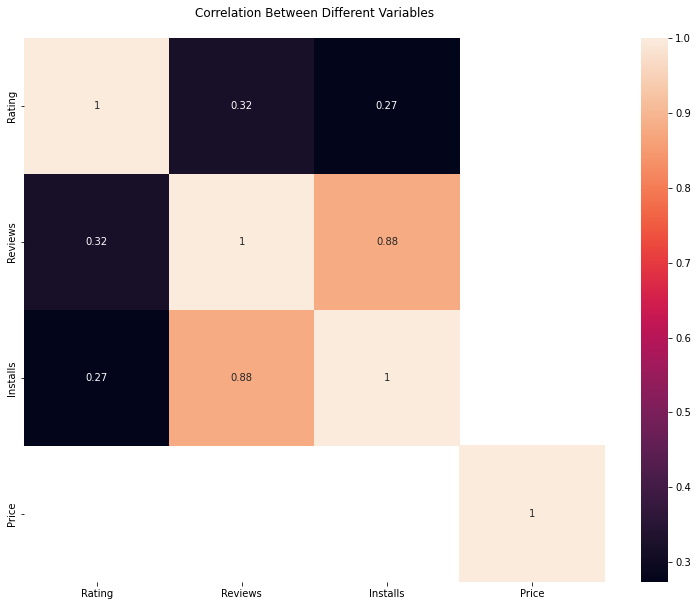

In [324]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

####Top 10 Generes in Google Play Store

In [325]:
i=df.groupby(['Genres'])[['Installs']].sum().sort_values(by="Installs",ascending=False)
i

,Installs
Genres,
Communication,32647276251
Productivity,14176091369
Social,14069867902
Tools,11442771915
Arcade,10727129155
...,...
Books & Reference;Education,11000
Trivia;Education,100
Books & Reference;Creativity,100


####Counts of Each Category

In [329]:
category_list_count=df.Category.value_counts()
category_list_count

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

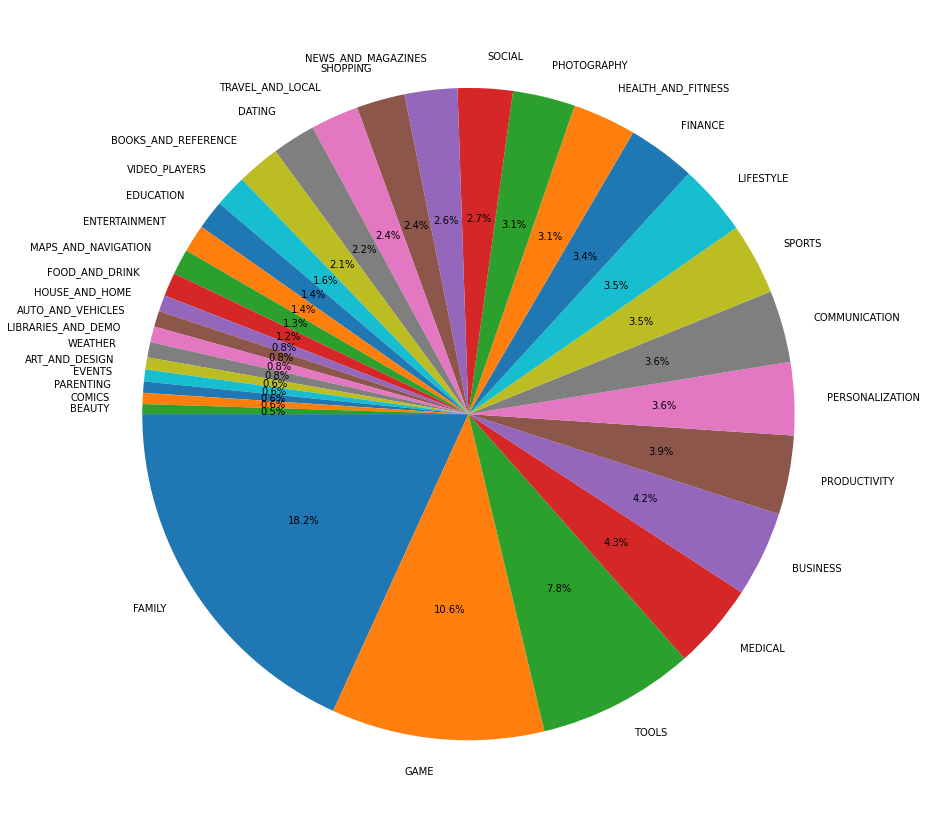

In [330]:
plt.figure(figsize=(25,15))
g = plt.pie(category_list_count, labels=category_list_count.index,autopct='%1.1f%%', startangle=180)
plt.show()

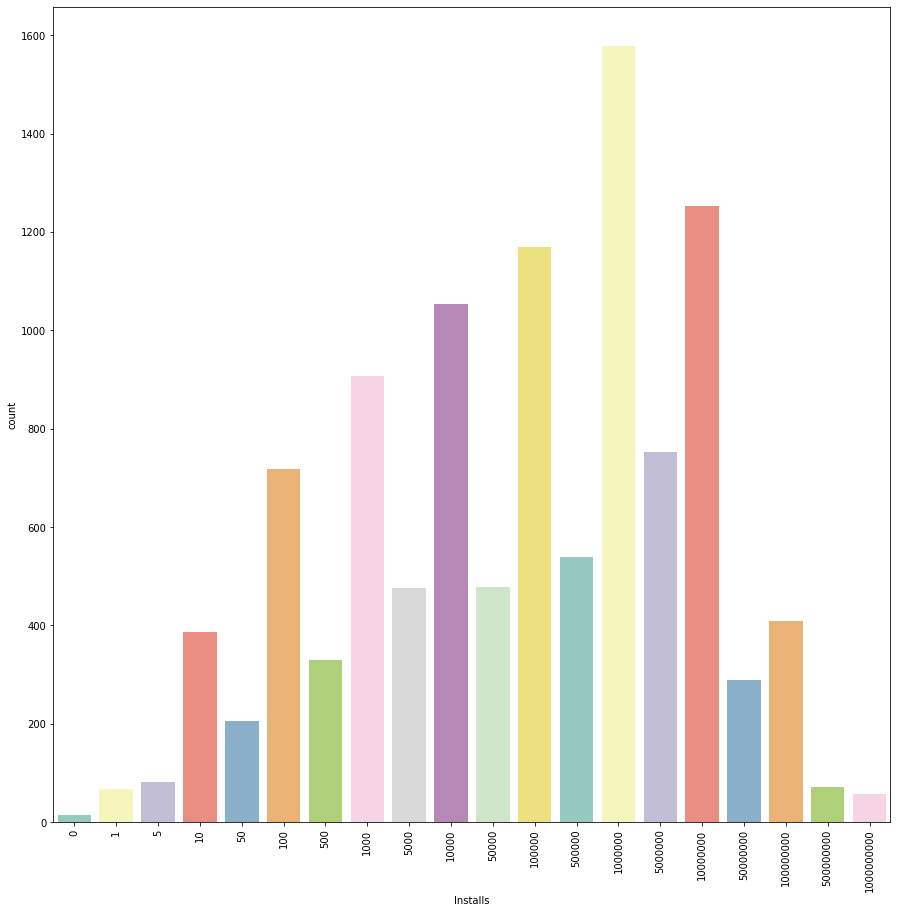

In [331]:
plt.subplots(figsize=(15,15))
plt.xticks(rotation=90)
ax = sns.countplot(x="Installs", data=df, palette="Set3")

####Apps_count in each Category

In [332]:
cat_Ins_groupby=df.groupby("Category")["Installs"].count().reset_index().sort_values(by='Installs',ascending=False)
cat_Ins_groupby

,Category,Installs
11,FAMILY,1972
14,GAME,1144
29,TOOLS,843
20,MEDICAL,463
4,BUSINESS,460
25,PRODUCTIVITY,424
23,PERSONALIZATION,392
6,COMMUNICATION,387
28,SPORTS,384
18,LIFESTYLE,382


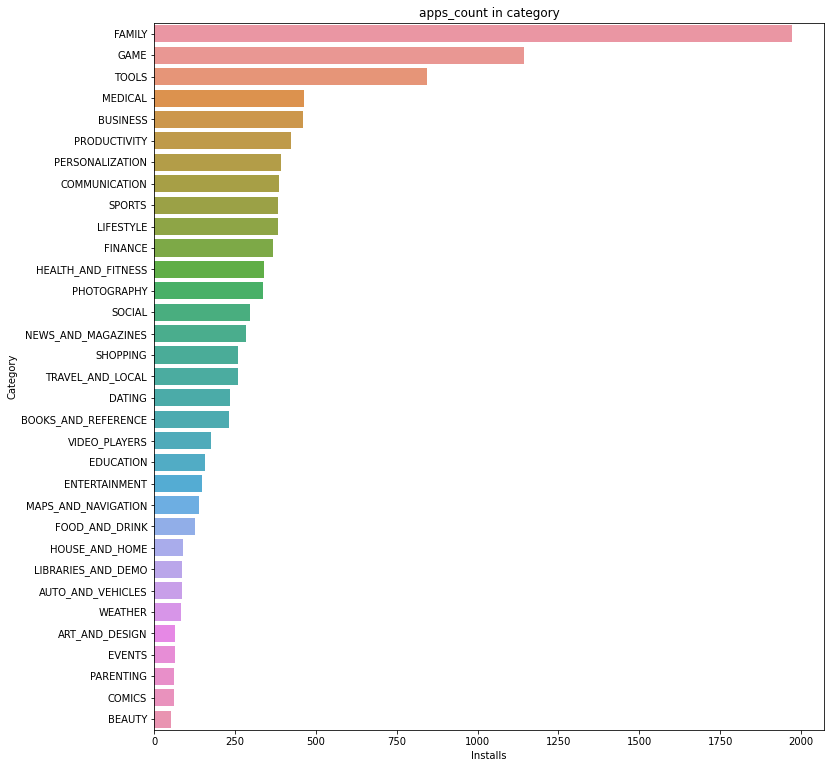

In [333]:
#which category has the maximum apps
plt.figure( figsize =(12,13) )
sns.barplot(x='Installs',y = 'Category', data =cat_Ins_groupby )
plt.title('apps_count in category')
plt.show()


####Apps counts in each category with their type

In [334]:
cat_type_app_groupby=df.groupby(['Category','Type'])[['App']].count().reset_index()
cat_type_app_groupby

,Category,Type,App
0,ART_AND_DESIGN,Free,62
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
59,TRAVEL_AND_LOCAL,Paid,12
60,VIDEO_PLAYERS,Free,171
61,VIDEO_PLAYERS,Paid,4
62,WEATHER,Free,74


In [335]:
app_count =cat_type_app_groupby.pivot('Category', 'Type', 'App').fillna(0).reset_index()
app_count


Type,Category,0,Free,Paid
0,ART_AND_DESIGN,0.0,62.0,3.0
1,AUTO_AND_VEHICLES,0.0,82.0,3.0
2,BEAUTY,0.0,53.0,0.0
3,BOOKS_AND_REFERENCE,0.0,203.0,28.0
4,BUSINESS,0.0,446.0,14.0
5,COMICS,0.0,60.0,0.0
6,COMMUNICATION,0.0,360.0,27.0
7,DATING,0.0,227.0,7.0
8,EDUCATION,0.0,152.0,4.0
9,ENTERTAINMENT,0.0,147.0,2.0


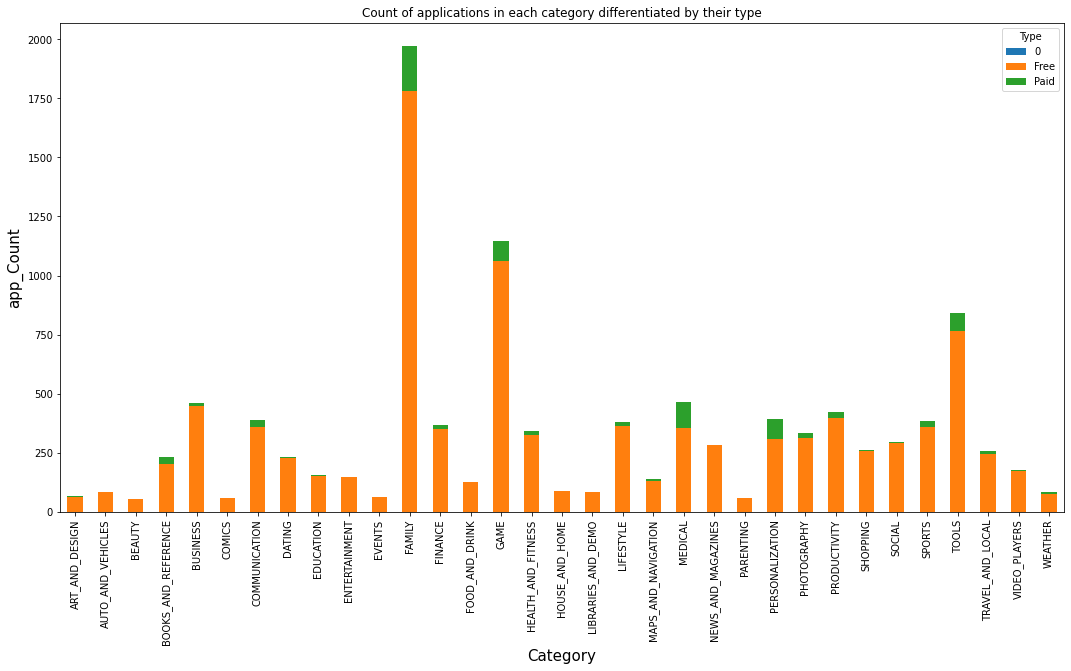

In [336]:
app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("app_Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

####Category with highest installs

####frequency of Rating

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


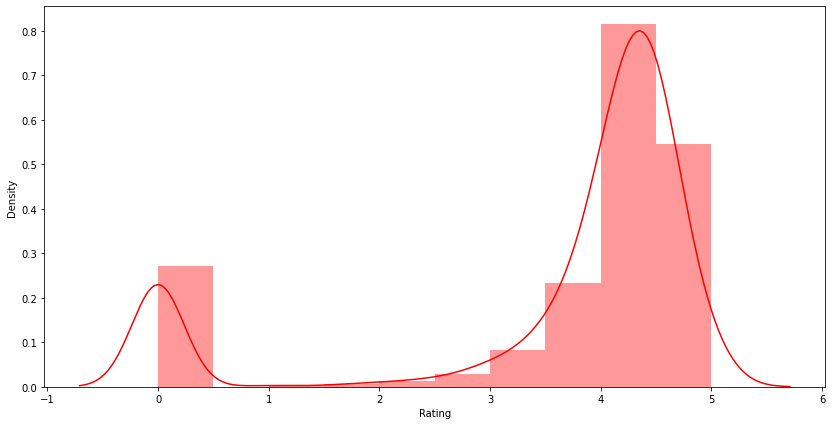

In [337]:
plt.figure(figsize=(14,7))
sns.distplot(df["Rating"],color="Red",bins=10)
#sns.kdeplot(df["Rating"], color="Red", shade = True)
plt.show()

we can see here that we have mostly apps with the Rating=4.3 